<a href="https://colab.research.google.com/github/fabiodotcom/Data-Science/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb na cidade de  *Seattle, WA*



  O [Airbnb](https://www.airbnb.com.br/) (Air, Bed and Breakfast) é considerada como uma das primeiras opções para quem deseja viajar e não quer abrir mão de ter uma experiência única. E, apesar de não possuir um hotel, com apenas 4 anos de sua fundação, já era considerado por muitos como a **principal empresa hospedagem da atualidade**. A empresa, que recentemente teve seu processo de abertura de capital na bolsa de Nasdaq, hoje conta com opções de hospedagem em mais de 30 mil cidades e 192 países.

A plataforma, que surgiu com o propósito de conectar pessoas que desejam se hospedar, com anfitriões que pretendem disponibilizar seus imóveis (que variam de casas, apartamentos, iglus, barcos e até castelos) de forma prática. O site permite que proprietários anunciem suas dependências totalmente de graça. Todo processo de reserva, pagamento e trocas de mensagens ocorre dentro da plataforma, onde é cobrada uma taxa do proprietário pelo uso dos serviços. 

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e estudos de *Data Science*.

**Neste *notebook*, iremos analisar os dados referentes à cidade Seattle, e ver quais insights podem ser extraídos a partir de dados brutos.**

![](https://drive.google.com/uc?export=view&id=1UuWqqtvIBs5zy-4U_lkt4mR7n3sv9KYx)

Localizada na costa oeste dos Estados Unidos, a cidade de Seattle figura entre os principais destinos de viagens para quem deseja visitar o país. Cercada de água, montanhas e florestas a cidade também e um importante polo tecnológico, com empresas como Amazon e Microsoft tendo suas sedes na região metropolitana.

A cidade de Seattle possui vários motivos para atrair turistas de todo o mundo, conhecida por ser a terra natal de grandes bandas de rock como Alice In Chains, Nirvana e Pearl Jam, também possui outras atrações como cafés (onde fica a sede do Starbucks), a famosa torre Space Needle que é o maior cartão postal da cidade e o museu MoPOP que é parada obrigatória para os amantes de música e cultura pop.

## Obtenção dos Dados

Todos os dados utilizados aqui foram obtidos a partir do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será feito o download do seguinte arquivo:



*   `listings.csv` - *Summary information and metrics for listings in Seattle (good for visualizations).*



In [77]:
# importar os pacotes necessarios:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
# importar o arquivo listings.csv para um DataFrame:
df = pd.read_csv('http://data.insideairbnb.com/united-states/wa/seattle/2020-12-23/visualisations/listings.csv')

## Análise dos Dados


Abaixo estão descritas todas as variáveis presentes no arquivo `listings.csv`, seguido do que cada uma representa:

* `id` - Número de id gerado para identificar o imóvel;
* `name` - Nome da propriedade anunciada;
* `host_id` - Número de id do (anfitrião) responsável pela propriedade;
* `host_name` - Nome do Anfitrião;
* `neighbourhood_group` - Região da cidade onde a propriedade está localizada;
* `neighbourhood` - Nome do bairro;
* `latitude` - Coordenada da latitude da propriedade;
* `longitude` - Coordenada da longitude da propriedade;
* `room_type` - Informa o tipo de quarto que é oferecido;
* `price` - Preço para alugar o imóvel;
* `minimum_nights` - Quantidade mínima de noites para reserva;
* `number_of_reviews` - Quantidade de avaliações que a propriedade possui;
* `last_review` - Data da última avaliação da propriedade;
* `reviews_per_month` - Quantidade de avaliações por mês;
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião;
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias.


Antes de iniciar qualquer análise, vamos verificar o *dataset*, analisando as 5 primeiras entradas.

In [79]:
# exibindo as 5 primeiras entradas no dataset:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9419,Glorious sun room w/ memory foambed,30559,Angielena,Other neighborhoods,Georgetown,47.55017,-122.31937,Private room,55,2,148,2019-12-27,1.17,7,268
1,9531,The Adorable Sweet Orange Craftsman,31481,Cassie,West Seattle,Fairmount Park,47.55539,-122.38474,Entire home/apt,165,28,41,2020-11-26,0.38,2,353
2,9534,The Coolest Tangerine Dream MIL!,31481,Cassie,West Seattle,Fairmount Park,47.55624,-122.38598,Entire home/apt,125,2,54,2020-11-14,0.50,2,232
3,9596,"the down home , spacious, central and fab!",14942,Joyce,Other neighborhoods,Wallingford,47.65479,-122.33652,Entire home/apt,100,4,97,2020-09-28,0.84,2,65
4,9909,Luna Lower - West Seattle,33360,Laura,West Seattle,Fairmount Park,47.56612,-122.37273,Entire home/apt,66,30,75,2020-12-08,0.55,6,364


Para uma melhor análise, o valor da coluna `price` será convertido para reais, utilizando a cotação do dia 14 de Fevereiro de 2021, onde um Dólar Americano equivale a R$5,37.

In [80]:
# conversão de preço da coluna price de Dólares para Reais:

df['price'] = df['price']*5.37

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? E quais são os seus tipos.**

In [82]:
# identificando o volume de dados do DataFrame:
print('Entradas:\t{}'.format(df.shape[0]))
print('Variáveis:\t{}'.format(df.shape[1]))

# verificando as 5 primeiras entradas do dataset:
display(df.dtypes)

Entradas:	4107
Variáveis:	16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Ao analisar um *dataset*, é importante verificar se existem valores nulos no banco de dados, uma vez que se houver uma grande quantidade de dados em branco, a análise da variável em questão pode ficar prejudicada. 

*   As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 17% das linhas.




In [83]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.169954
last_review                       0.169954
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

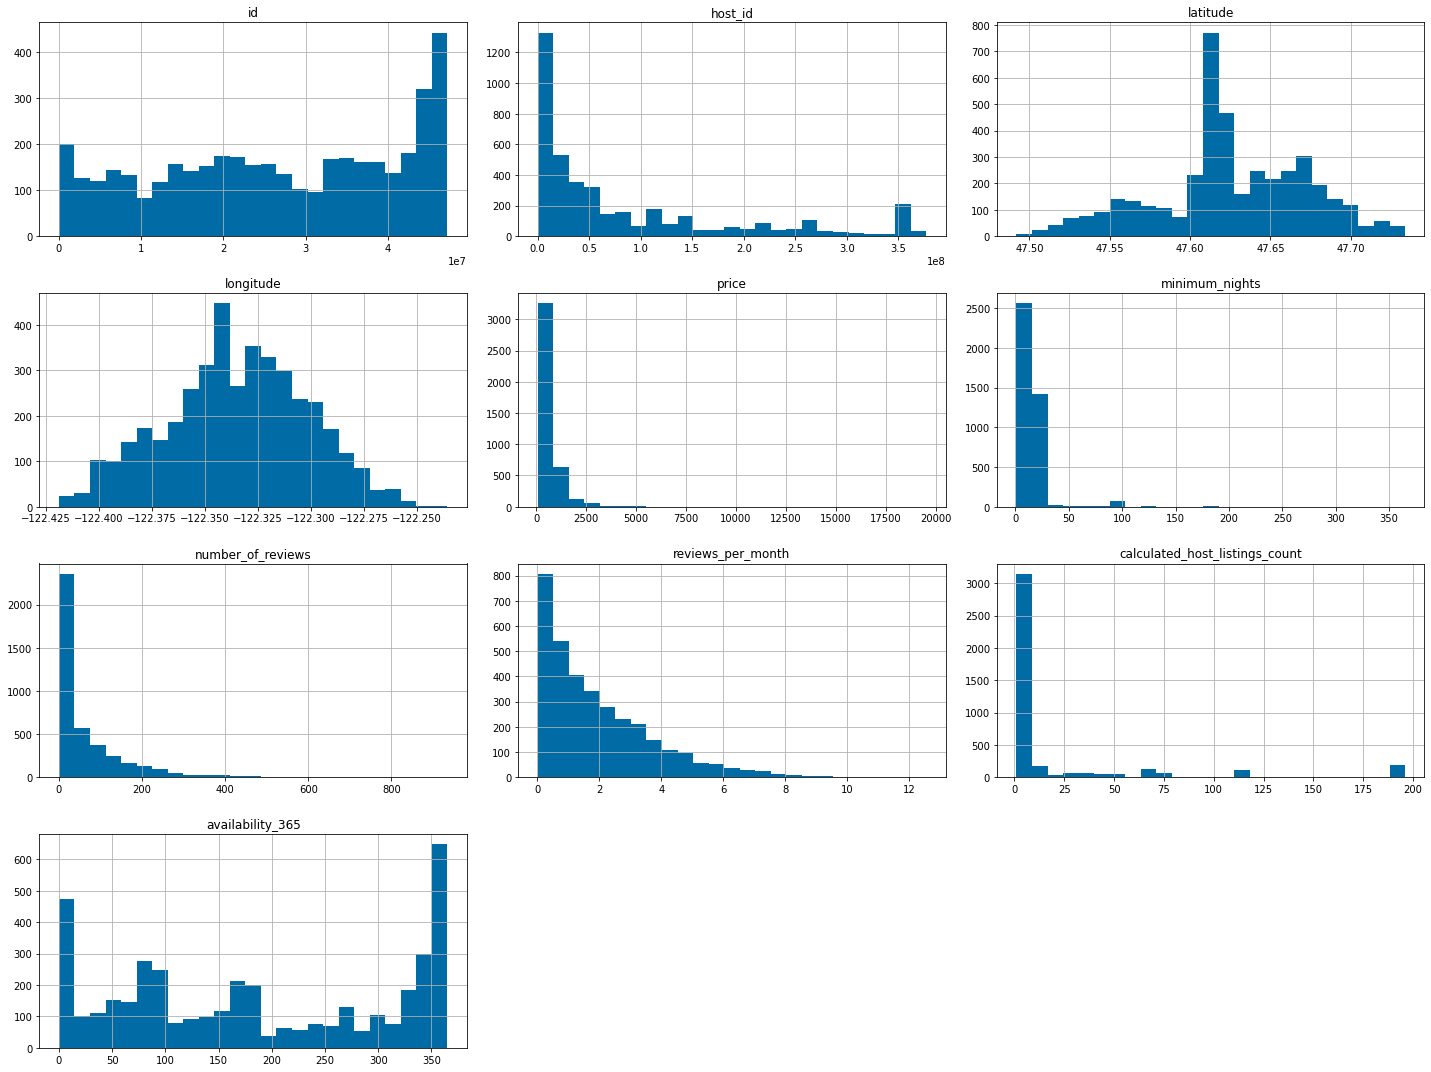

In [99]:
# verificando o histograma das variáveis numéricas:
plt.style.use('tableau-colorblind10')
df.hist(bins=25, figsize=(20,15));
plt.tight_layout()

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. olhe, por exemplo, as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam na detecção de *outliers*. São elas:

*   Resumo estatístico por meio do método `describe`
*   Plotar `boxplots` para a variável. 



In [85]:
# resumo estátistico das variáveis numéricas
df[['price','minimum_nights','number_of_reviews','reviews_per_month',
   'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4107.000000,4107.000000,4107.000000,3409.000000,4107.000000,4107.000000
mean,707.022542,14.534697,63.138057,1.973247,20.409301,186.442172
std,641.792268,20.177378,90.731410,1.796876,46.175081,129.247437
min,80.550000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,408.120000,2.000000,2.000000,0.550000,1.000000,76.000000
50%,537.000000,3.000000,25.000000,1.470000,2.000000,173.000000
75%,778.650000,30.000000,88.000000,2.920000,7.000000,327.000000
max,19536.060000,365.000000,935.000000,12.550000,196.000000,365.000000


Olhando o resumo estátistico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% dos seus valores abaixo de 778,65 reais, porém seu valor máximo é de 19.536,00 reais.
* As variáveis `minimum_nights` e `calculated_host_listing_count` possuem valores bem distantes da média, o que dificulta a sua análise.  

#### Boxplot para mimimum_nights

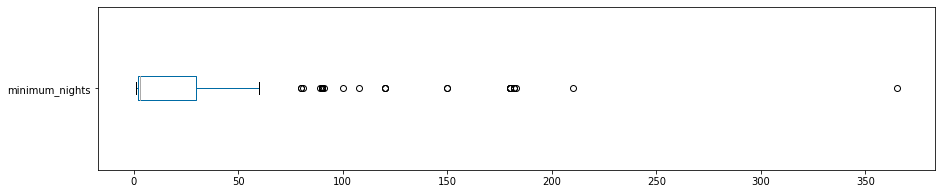

minimum_nights: valores acima de 30:
128 entradas
3.1166%


In [86]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade mínima de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 30:')
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100 ))

#### Boxplot para price

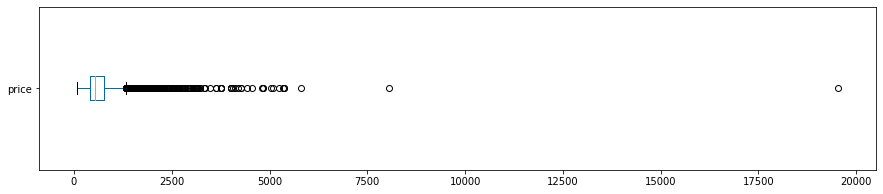


price: valores acima de 2500
87 entradas
2.1183%


In [87]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade mínima de valores acima de 2500
print('\nprice: valores acima de 2500')
print("{} entradas".format(len(df[df.price > 2500])))
print("{:.4f}%".format((len(df[df.price > 2500]) / df.shape[0])*100 ))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

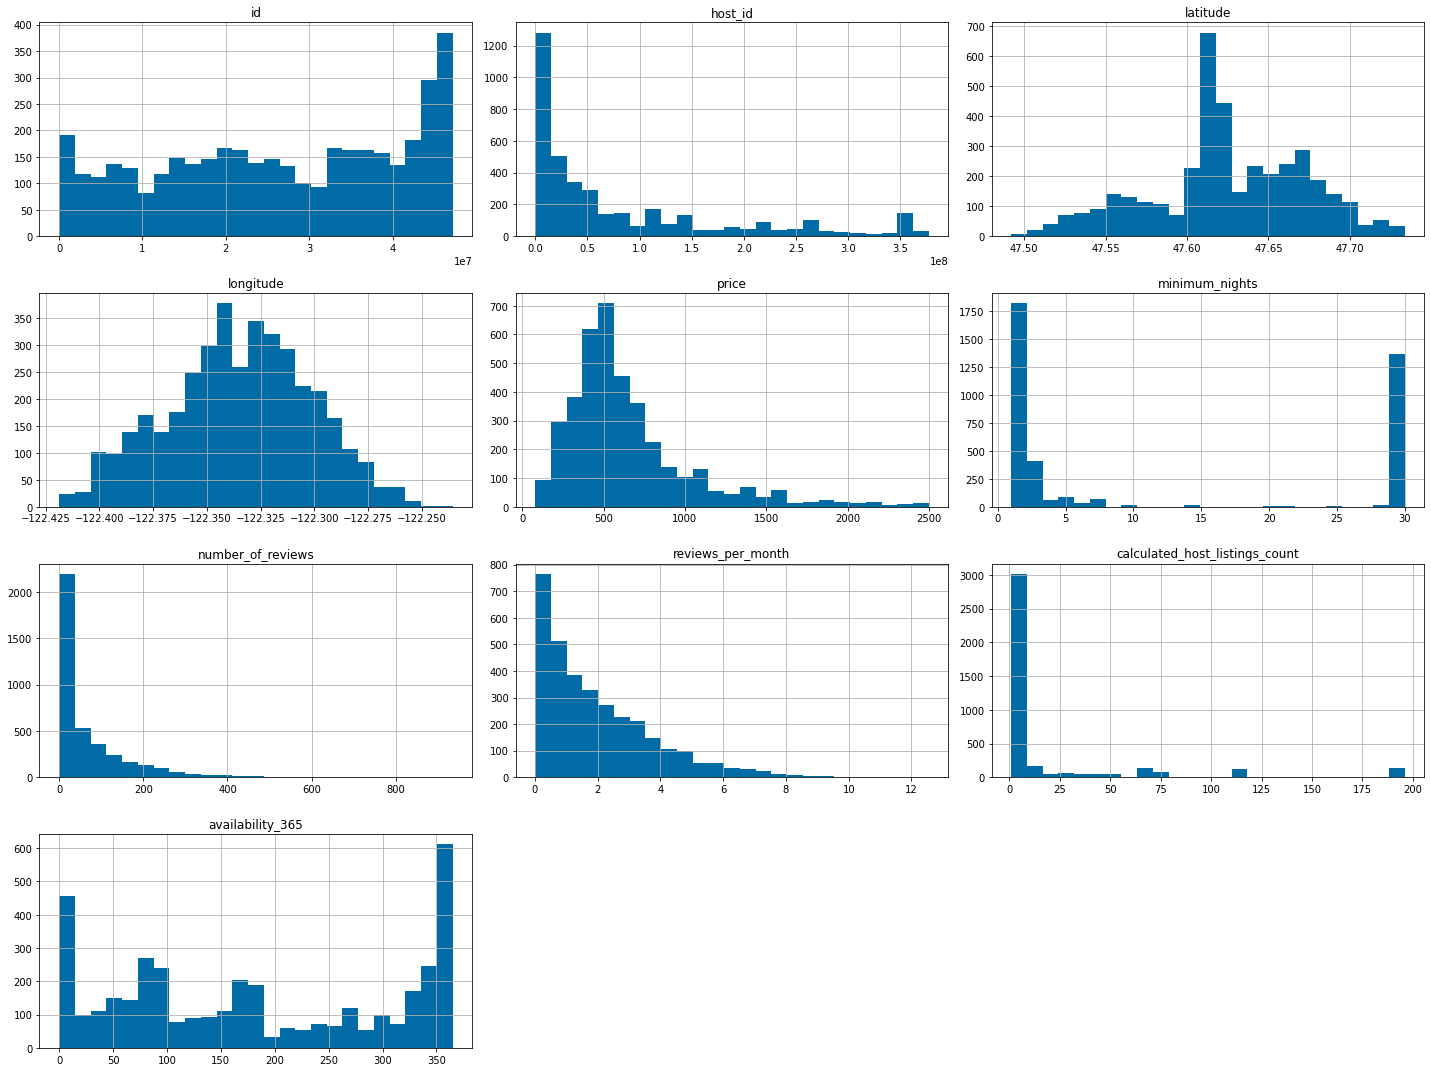

In [88]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=25, figsize=(20,15));
plt.tight_layout()


### **Q5. Qual a correlação existente entre as variáveis**

In [89]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.043997,-0.109055,-0.149099,-0.015261,0.084737
minimum_nights,-0.043997,1.000000,-0.255624,-0.368285,0.292297,0.158125
number_of_reviews,-0.109055,-0.255624,1.000000,0.758595,-0.257230,-0.015544
reviews_per_month,-0.149099,-0.368285,0.758595,1.000000,-0.255418,-0.068885
calculated_host_listings_count,-0.015261,0.292297,-0.257230,-0.255418,1.000000,0.188003
availability_365,0.084737,0.158125,-0.015544,-0.068885,0.188003,1.000000


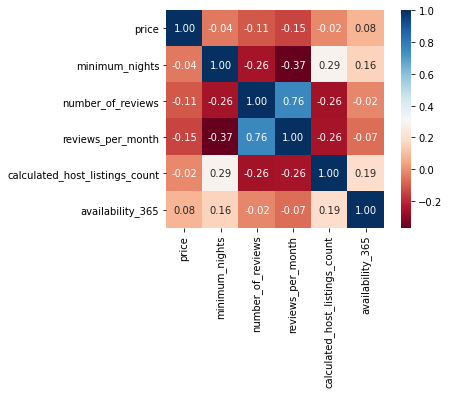

In [90]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

O mapa de correlações pode ser um pouco mais complexo de se entender, já que cruza todos os dados numéricos presentes no *dataset*. Utilizando a escala de cores, as informações ficam mais fáceis de serem interpretadas, uma vez que os valores acima de zero já apresentam algum tipo de ligação, como por exemplo as colunas `minimum_nights` e `availability_365` demonstram que o numero mínimo de noites costuma a ser maior em propriedades que estão disponíveis o ano todo.    

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [91]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3144
Private room        701
Shared room          34
Hotel room           15
Name: room_type, dtype: int64

In [92]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0])*100

Entire home/apt    80.739599
Private room       18.002054
Shared room         0.873138
Hotel room          0.385208
Name: room_type, dtype: float64

### **Q7. Quais as localidades com diárias mais caras e econômicas do dataset?**

Ao planejar uma viagem, é sempre importante ter uma ideia das melhores localidades, com boa segurança e pontos de interesse próximos. O preço das diárias nem sempre reflete isso (por exemplo, propriedades na área central costumam a ter valores mais elevados por conta da facilidade de acesso, mas em contrapartida tendem a ser mais barulhentas e difíceis para se encontrar vagas de estacionamento) mas é um bom indicativo para se ter como ponto de partida para uma escolha mais assertiva. 
Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação, vamos comparar tanto os bairros com as diárias mais altas quanto as mais econômicas.  



In [93]:
# preço das localidades com diárias mais altas:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]

neighbourhood
Portage Bay              944.046000
Briarcliff               901.488750
Harrison/Denny-Blaine    887.840000
West Queen Anne          882.924179
Madison Park             874.236000
Name: price, dtype: float64

In [94]:
# preço das localidades com diárias mais econômicas:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:5]

neighbourhood
Holly Park            221.960000
Rainier View          296.021250
South Park            366.055000
North College Park    367.627297
Montlake              370.858776
Name: price, dtype: float64

Observando o mapa da cidade, nota-se que as localidades com custo mais elevado, costumam a ficar em locais as margens de lagos. Já as localidades mais econômicas, geralmente ficam em áreas mais internas da cidade, próximas a vias de grande movimentação.

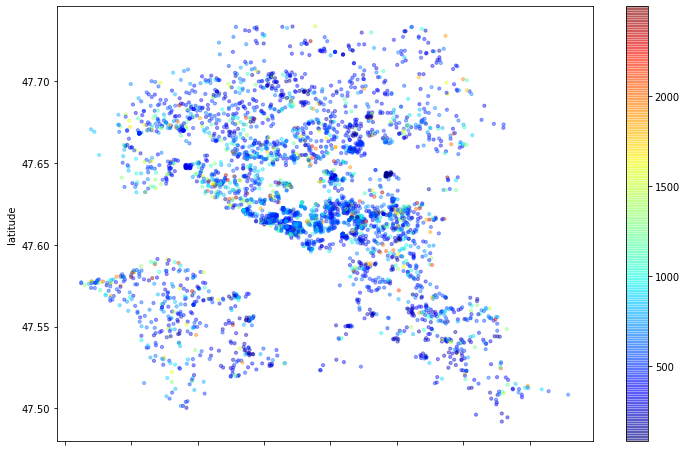

In [98]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=10,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é o valor médio do mínimo de noites para aluguel (minimum_nights)?**

In [96]:
# ver a média da coluna `minimum_nights`
df_clean['minimum_nights'].mean()

12.151771956856702

## Conclusões


Após a análise dos dados, pode-se concluir que é de extrema importância realizar uma pesquisa aprofundada ao planejar uma viagem. Tanto para se ter uma melhor ideia da oferta de hospedagens, mas também para escolher os melhores locais visando o fator custo/benefício. A análise de dados auxilia nesse processo, e, com poucas linhas de código, é possível obter informações textuais e gráficas que nem sempre estão disponíveis de maneira aberta.